## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import SVG, Markdown, display, display_pretty
pd.set_option('display.max_columns', None)

In [2]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

## Load data

In [3]:
df1 = pd.read_csv('results.csv')
df2 = pd.read_csv('results_2.csv')
df = pd.concat([df1,df2], axis=0, ignore_index=True)

In [4]:
df.shape

(167, 68)

In [5]:
df.head()

,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
0,0,none,ReLU,MeanSquaredError,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,tanh,tanh,tanh,2,1,128,"lr=0.01,k=0.92",0.01,Adam,0,901835.000000,838104.250000,965565.750000,450821.593750,418880.250000,482762.937500,451012.687500,419223.187500,482802.187500,0.697684,0.632976,0.762393,450340.343750,415430.281250,485250.406250,32.872524,31.506468,34.238579,42106.539062,41142.347656,43070.726562,0.734805,0.722847,0.746763,0.298486,0.265597,0.331375,2.978630,2.836857,3.120404,450531.000000,415772.343750,485289.656250,32.906860,31.554300,34.259422,42790.531250,41304.679688,44276.382812,0.745970,0.725119,0.766820,0.160999,0.068674,0.253323,3.681219,2.883394,4.479044,0.697549,0.632953,0.762145
1,1,CenterLogRatio,none,LossMeanSquaredErrorWrapper,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,tanh,tanh,tanh,2,1,128,"lr=0.01,k=0.92",0.01,Adam,0,12.675097,11.978592,13.371602,6.706434,6.101823,7.311046,5.373005,5.282807,5.463203,0.595658,0.593962,0.597353,6.704134,6.100764,7.307505,1.874495,1.779087,1.969902,18808.625000,16799.746094,20817.505859,0.655162,0.637543,0.672780,0.339398,0.242047,0.436749,2.059752,1.931433,2.188071,5.371642,5.282267,5.461018,1.716659,1.678242,1.755076,20014.156250,18087.580078,21940.732422,0.651614,0.637628,0.665600,0.333257,0.255587,0.410927,2.038677,1.930570,2.146784,0.595630,0.593934,0.597326
2,2,Percentage,Softmax,LossCategoricalCrossentropyWrapper,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,tanh,tanh,tanh,2,1,128,"lr=0.01,k=0.92",0.01,Adam,0,13.214434,12.475080,13.953789,6.446648,6.177170,6.716125,6.473631,5.566997,7.380266,0.294155,0.191958,0.396353,0.000514,0.000215,0.000812,0.001875,0.001719,0.002032,14037.256836,4388.806641,23685.707031,0.674023,0.615891,0.732155,0.394789,0.270671,0.518906,2.507769,2.308319,2.707218,0.000396,0.000222,0.000570,0.001987,0.001783,0.002191,39346.242188,6688.388184,72004.093750,0.714069,0.643083,0.785054,0.205238,-0.114993,0.525469,2.993620,1.977636,4.009604,0.294012,0.191839,0.396185
3,3,CenterLogRatio,Softmax,LossCategoricalCrossentropyWrapper,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,tanh,tanh,tanh,2,1,128,"lr=0.01,k=0.92",0.01,Adam,0,14.429597,11.426386,17.432809,7.301231,5.300383,9.302080,6.489450,5.450629,7.528271,0.638916,0.602458,0.675374,9.711302,9.699252,9.723351,2.775608,2.765568,2.785648,6353.747070,3466.388184,9241.106445,0.697517,0.616236,0.778798,0.463589,0.411110,0.516068,2.960885,1.744119,4.177652,9.712762,9.699392,9.726131,2.775676,2.765573,2.785779,9616.738281,3599.010986,15634.465820,0.688504,0.611313,0.765694,0.443567,0.370357,0.516777,2.550132,1.830927,3.269338,0.638898,0.602432,0.675364
4,4,Percentage,Softmax,LossBrayCurtis,100,b -> 512 -> 256 -> 10

In [6]:
group_columns = ['Input transform', 'Output transform', 'Reconstruction Loss', 'Latent Space',
                 'Bioma Autoencoder', 'Domain Autoencoder', 'Activation Encoder',
                 'Activation Decoder', 'Activation Latent',
                 'Batch Size', 'Learning Rate', 'Optimizer']
metrics_columns = ['domain_mse', 'domain_mae', 'domain_mape', 'domain_BrayCurtis',
                   'domain_pearson_corr', 'domain_jensen_shannon_divergence']

df.columns

Index(['experiment n.', 'Input transform', 'Output transform',
       'Reconstruction Loss', 'Latent Space', 'Bioma Autoencoder',
       'Domain Autoencoder', 'Activation Encoder', 'Activation Decoder',
       'Activation Latent', 'CV folds', 'Epochs', 'Batch Size',
       'Learning Rate Scheduler', 'Learning Rate', 'Optimizer',
       'best_lost_epoch', 'loss', 'loss_min', 'loss_max', 'bioma_loss',
       'bioma_loss_min', 'bioma_loss_max', 'domain_loss', 'domain_loss_min',
       'domain_loss_max', 'latent_loss', 'latent_loss_min', 'latent_loss_max',
       'bioma_mse', 'bioma_mse_min', 'bioma_mse_max', 'bioma_mae',
       'bioma_mae_min', 'bioma_mae_max', 'bioma_mape', 'bioma_mape_min',
       'bioma_mape_max', 'bioma_BrayCurtis', 'bioma_BrayCurtis_min',
       'bioma_BrayCurtis_max', 'bioma_pearson_corr', 'bioma_pearson_corr_min',
       'bioma_pearson_corr_max', 'bioma_jensen_shannon_divergence',
       'bioma_jensen_shannon_divergence_min',
       'bioma_jensen_shannon_divergence

## show mean validation results averaging by column

In [7]:
df[group_columns[0:3] + metrics_columns].groupby(group_columns[0:3]).mean().head()

domain_mse  \
Input transform Output transform Reconstruction Loss                                 
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper       9.712762   
                none             LossMeanSquaredErrorWrapper              3.945122   
Percentage      Softmax          LossBrayCurtis                           0.000198   
                                 LossCategoricalCrossentropyWrapper       0.000108   
none            ReLU             MeanSquaredError                    364350.940341   

                                                                     domain_mae  \
Input transform Output transform Reconstruction Loss                              
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper    2.775676   
                none             LossMeanSquaredErrorWrapper           1.499350   
Percentage      Softmax          LossBrayCurtis                        0.001738   
                                 LossCategoricalCrossentropyWrapper    0.001225   
none            ReLU             MeanSquaredError                     33.571978   

                                                                      domain_mape  \
Input transform Output transform Reconstruction Loss                                
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper   9616.738281   
                none             LossMeanSquaredErrorWrapper          6989.356019   
Percentage      Softmax          LossBrayCurtis                      16826.728516   
                                 LossCategoricalCrossentropyWrapper  12528.745845   
none            ReLU             MeanSquaredError                    15348.255318   

                                                                     domain_BrayCurtis  \
Input transform Output transform Reconstruction Loss                                     
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper           0.688504   
                none             LossMeanSquaredErrorWrapper                  0.438178   
Percentage      Softmax          LossBrayCurtis                               0.624686   
                                 LossCategoricalCrossentropyWrapper           0.441260   
none            ReLU             MeanSquaredError                             0.561858   

                                                                     domain_pearson_corr  \
Input transform Output transform Reconstruction Loss                                       
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper             0.443567   
                none             LossMeanSquaredErrorWrapper                    0.692868   
Percentage      Softmax          LossBrayCurtis                                 0.386076   
                                 LossCategoricalCrossentropyWrapper             0.703529   
none            ReLU             MeanSquaredError                               0.512864   

                                                                     domain_jensen_shannon_divergence  
Input transform Output transform Reconstruction Loss                                                   
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper                          2.550132  
                none             LossMeanSquaredErrorWrapper                                 0.980954  
Percentage      Softmax          LossBrayCurtis                                              1.864601  
                                 LossCategoricalCrossentropyWrapper                          1.004141  
none            ReLU             MeanSquaredError                                            1.974664

In [8]:
df[[group_columns[3]] + metrics_columns].groupby(group_columns[3]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Latent Space,,,,,,
10,122732.732378,11.764713,11769.587475,0.490852,0.617535,1.371938
50,121283.169561,11.644189,11059.844772,0.473014,0.650537,1.289478
100,116316.435842,11.316731,12055.996110,0.483657,0.633272,1.330254


In [9]:
df[[group_columns[4]] + metrics_columns].groupby(group_columns[4]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Bioma Autoencoder,,,,,,
b -> 10 -> b,138069.859894,11.403797,14255.346029,0.504581,0.574787,1.328486
b -> 100 -> b,132533.678458,11.628271,11751.736328,0.467644,0.661891,1.106021
b -> 256 -> 10 -> 256 -> b,116174.830601,11.951088,10862.925646,0.472481,0.649483,1.237845
b -> 256 -> 100 -> 256 -> b,113734.378889,11.559168,10474.499946,0.460376,0.669684,1.235546
b -> 256 -> 50 -> 256 -> b,115409.340670,11.584327,10475.664497,0.462837,0.668740,1.252847


In [10]:
df[[group_columns[5]] + metrics_columns].groupby(group_columns[5]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Domain Autoencoder,,,,,,
d -> 10 -> b,138069.859894,11.403797,14255.346029,0.504581,0.574787,1.328486
d -> 100 -> b,132533.678458,11.628271,11751.736328,0.467644,0.661891,1.106021
d -> 16 -> 10 -> 256 -> b,116174.830601,11.951088,10862.925646,0.472481,0.649483,1.237845
d -> 16 -> 100 -> 256 -> b,113734.378889,11.559168,10474.499946,0.460376,0.669684,1.235546
d -> 16 -> 50 -> 256 -> b,115409.340670,11.584327,10475.664497,0.462837,0.668740,1.252847


In [11]:
df[[group_columns[6]] + metrics_columns].groupby(group_columns[6]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Activation Encoder,,,,,,
relu,105919.763393,11.562138,10107.339862,0.464562,0.666608,1.242919
sigmoid,130808.327373,11.754477,11982.564336,0.496910,0.608528,1.509686
tanh,122986.635898,11.401197,12732.852291,0.485847,0.626807,1.246792


In [12]:
df[[group_columns[7]] + metrics_columns].groupby(group_columns[7]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Activation Decoder,,,,,,
relu,105919.763393,11.562138,10107.339862,0.464562,0.666608,1.242919
sigmoid,130808.327373,11.754477,11982.564336,0.496910,0.608528,1.509686
tanh,122986.635898,11.401197,12732.852291,0.485847,0.626807,1.246792


In [13]:
df[[group_columns[8]] + metrics_columns].groupby(group_columns[8]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Activation Latent,,,,,,
sigmoid,121330.151264,11.731669,11180.373427,0.477448,0.641666,1.314648
tanh,118741.699616,11.412821,12075.382143,0.487340,0.626326,1.345523


In [14]:
df[[group_columns[9]] + metrics_columns].groupby(group_columns[9]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Batch Size,,,,,,
64,120919.644039,11.693610,11206.782193,0.476294,0.643888,1.290575
128,90109.217000,7.480584,25718.879297,0.684968,0.305827,2.625650


In [15]:
df[group_columns[10:12] + metrics_columns].groupby(group_columns[10:12]).mean().head()

,,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Learning Rate,Optimizer,,,,,,
0.01,Adam,90109.217000,7.480584,25718.879297,0.684968,0.305827,2.625650
constant = 0.001,Adam,120919.644039,11.693610,11206.782193,0.476294,0.643888,1.290575


### Best experiment per metric

In [16]:
print(metrics_columns[0], df[metrics_columns[0]].min())

df[df[metrics_columns[0]] == df[metrics_columns[0]].min()].head()

domain_mse 9.461063018534333e-05


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
149,144,Percentage,Softmax,LossCategoricalCrossentropyWrapper,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,NaN,constant = 0.001,Adam,98,8.368278,8.318864,8.414001,3.93034,3.891721,3.953472,4.406012,4.382097,4.424079,0.031927,0.030219,0.03645,0.000012,0.000008,0.000014,0.000498,0.00049,0.000506,5032.652344,4372.962891,6027.231934,0.180516,0.177323,0.183812,0.945885,0.943528,0.950084,0.272187,0.247264,0.305045,0.000095,0.000087,0.000106,0.001166,0.001145,0.001205,11811.450195,10950.145508,13715.480469,0.419941,0.412129,0.434126,0.74001,0.730928,0.747933,0.913341,0.876839,0.995112,0.032015,0.030286,0.036625


In [17]:
print(metrics_columns[1], df[metrics_columns[1]].min())

df[df[metrics_columns[1]] == df[metrics_columns[1]].min()].head()

domain_mae 0.0011643554316833615


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
133,128,Percentage,Softmax,LossCategoricalCrossentropyWrapper,50,b -> 512 -> 256 -> 50 -> 256 -> 512 -> b,d -> 32 -> 16 -> 50 -> 256 -> 512 -> b,relu,relu,tanh,5,100,64,NaN,constant = 0.001,Adam,45,8.509876,8.447467,8.557366,4.062536,4.017214,4.094982,4.419092,4.388335,4.446308,0.028247,0.024316,0.034251,0.000018,0.000014,0.000022,0.000687,0.000662,0.000719,7196.27832,6145.641602,8155.869629,0.248419,0.238923,0.259555,0.885561,0.868161,0.898662,0.450607,0.405227,0.497988,0.000097,0.000091,0.000105,0.001164,0.001131,0.0012,11249.448242,9787.261719,13069.101562,0.419387,0.407033,0.432405,0.739555,0.730173,0.746741,0.908313,0.870218,0.984119,0.028254,0.024283,0.033726


In [18]:
print(metrics_columns[2], df[metrics_columns[2]].min())

df[df[metrics_columns[2]] == df[metrics_columns[2]].min()].head()

domain_mape 4303.5390625


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
8,3,none,ReLU,MeanSquaredError,10,b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,relu,relu,sigmoid,5,100,64,NaN,constant = 0.001,Adam,94,626638.043304,480758.966518,827384.09375,330836.625,232114.703125,417050.84375,295801.21875,210979.390625,410333.03125,0.188007,0.155117,0.265832,334740.625,235795.53125,423099.5625,34.424278,31.391891,36.081093,4645.135742,2496.576172,10070.257812,0.670146,0.653803,0.688439,0.488498,0.300957,0.542228,3.812742,3.712293,3.944927,299262.375,214416.640625,408683.90625,34.911118,31.223831,36.996483,4303.539062,2592.443848,8690.478516,0.667348,0.645876,0.68849,0.500157,0.296202,0.596234,3.767088,3.499572,3.944409,0.187885,0.155002,0.264676


In [19]:
print(metrics_columns[3], df[metrics_columns[3]].min())

df[df[metrics_columns[3]] == df[metrics_columns[3]].min()].head()

domain_BrayCurtis 0.4150770306587219


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
98,93,CenterLogRatio,none,LossMeanSquaredErrorWrapper,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,relu,relu,sigmoid,5,100,64,NaN,constant = 0.001,Adam,95,6.460682,6.370147,6.626141,2.582258,2.52587,2.750561,3.806119,3.766904,3.832066,0.072305,0.059586,0.093114,2.579803,2.524734,2.751765,1.092962,1.072939,1.132579,3415.563232,3000.986816,4181.164551,0.33477,0.319356,0.356761,0.776565,0.755736,0.787698,0.62092,0.592792,0.65322,3.797141,3.755654,3.816976,1.469721,1.45138,1.490446,6430.97998,5682.214355,7210.463379,0.415077,0.406309,0.427301,0.72355,0.711124,0.738428,0.890389,0.842042,0.981058,0.072176,0.059579,0.093195


In [20]:
print(metrics_columns[4], df[metrics_columns[4]].max())

df[df[metrics_columns[4]] == df[metrics_columns[4]].max()].head()

domain_pearson_corr 0.7400103807449341


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
149,144,Percentage,Softmax,LossCategoricalCrossentropyWrapper,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,NaN,constant = 0.001,Adam,98,8.368278,8.318864,8.414001,3.93034,3.891721,3.953472,4.406012,4.382097,4.424079,0.031927,0.030219,0.03645,0.000012,0.000008,0.000014,0.000498,0.00049,0.000506,5032.652344,4372.962891,6027.231934,0.180516,0.177323,0.183812,0.945885,0.943528,0.950084,0.272187,0.247264,0.305045,0.000095,0.000087,0.000106,0.001166,0.001145,0.001205,11811.450195,10950.145508,13715.480469,0.419941,0.412129,0.434126,0.74001,0.730928,0.747933,0.913341,0.876839,0.995112,0.032015,0.030286,0.036625


In [21]:
print(metrics_columns[5], df[metrics_columns[5]].min())

df[df[metrics_columns[5]] == df[metrics_columns[5]].min()].head()

domain_jensen_shannon_divergence 0.8903892636299133


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
98,93,CenterLogRatio,none,LossMeanSquaredErrorWrapper,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,relu,relu,sigmoid,5,100,64,NaN,constant = 0.001,Adam,95,6.460682,6.370147,6.626141,2.582258,2.52587,2.750561,3.806119,3.766904,3.832066,0.072305,0.059586,0.093114,2.579803,2.524734,2.751765,1.092962,1.072939,1.132579,3415.563232,3000.986816,4181.164551,0.33477,0.319356,0.356761,0.776565,0.755736,0.787698,0.62092,0.592792,0.65322,3.797141,3.755654,3.816976,1.469721,1.45138,1.490446,6430.97998,5682.214355,7210.463379,0.415077,0.406309,0.427301,0.72355,0.711124,0.738428,0.890389,0.842042,0.981058,0.072176,0.059579,0.093195


# Conclusions

- There is not too much diference among the activation functions
- Center log ratio and percentage works similary, none transformation works much worse (see how graph evolves)
- The bigger the latent space the better although there is not too much difference between 50 and 100
- Smaller autoencoder work better in general but we got the best results with bigger autoencoders (more layers, more nodes per layer)
- batch size 64 with lr of 0.001 works better than batch size of 128 with lr 0.01. Probably because the small dataset

# Experiments

In [1]:
from train import *
from test import *
from layers import *
from utils import *
from loss import *

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | CenterLogRatio |
| Output transform | none |
| Reconstruction Loss | LossMeanSquaredErrorWrapper |
| Latent Space | 100 |
| Bioma Autoencoder | b -> 521 -> 256 -> 100 -> 256 -> 521 -> b |
| Domain Autoencoder | d -> 32 -> 16 -> 100 -> 256 -> 521 -> b |
| Activation Encoder | relu |
| Activation Decoder | relu |
| Activation Latent | sigmoid |
| CV folds | 5 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>99</b></p>

<b>loss</b>: 6.2537 (min: 5.8305, max: 6.4497)

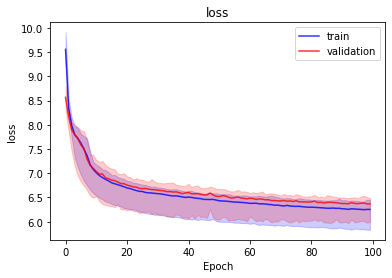

<b>bioma_loss</b>: 2.4125 (min: 2.0052, max: 2.5951)

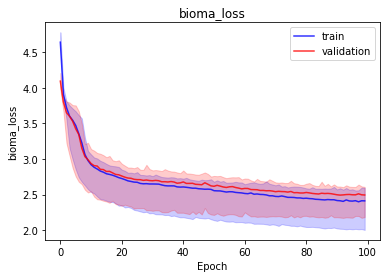

<b>domain_loss</b>: 3.7813 (min: 3.7728, max: 3.7989)

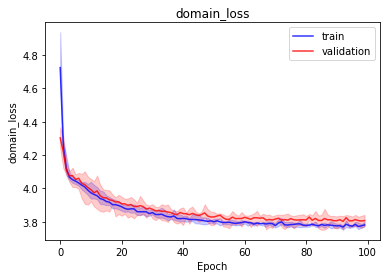

<b>latent_loss</b>: 0.0658 (min: 0.0441, max: 0.0812)

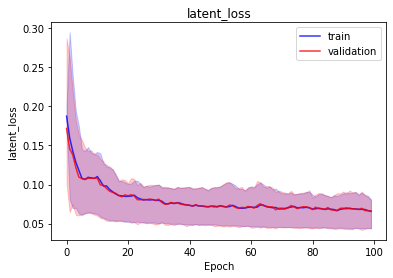

<b>bioma_mse</b>: 2.4105 (min: 2.0028, max: 2.5968)

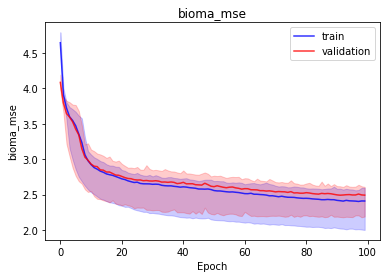

<b>bioma_mae</b>: 1.0439 (min: 0.9252, max: 1.1013)

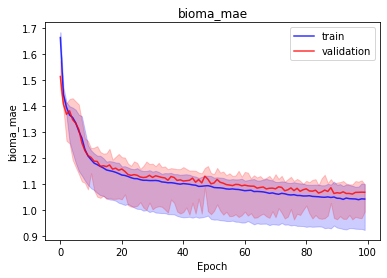

<b>bioma_mape</b>: 3096.1067 (min: 2387.6907, max: 3503.7163)

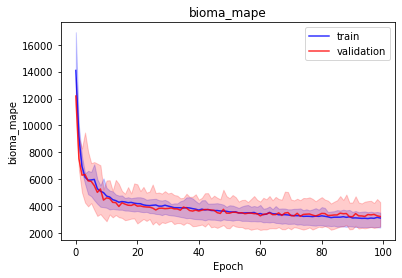

<b>bioma_BrayCurtis</b>: 0.3141 (min: 0.2534, max: 0.3488)

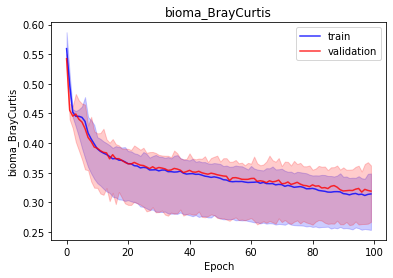

<b>bioma_pearson_corr</b>: 0.7974 (min: 0.7619, max: 0.8671)

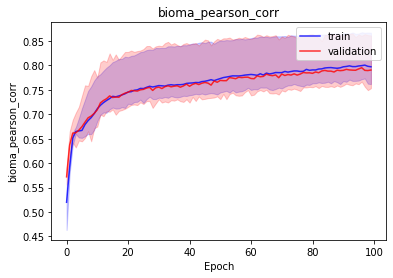

<b>bioma_jensen_shannon_divergence</b>: 0.5418 (min: 0.3667, max: 0.6297)

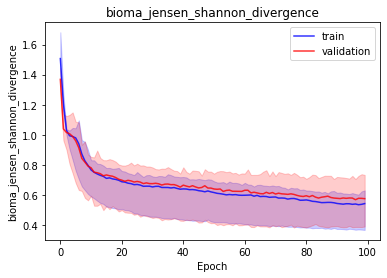

<b>domain_mse</b>: 3.7774 (min: 3.7659, max: 3.7837)

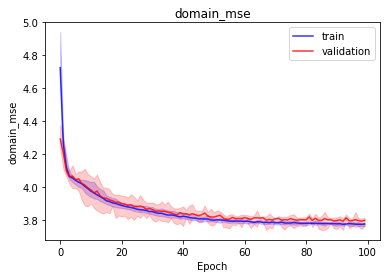

<b>domain_mae</b>: 1.4663 (min: 1.4622, max: 1.4702)

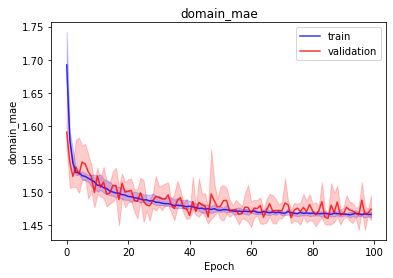

<b>domain_mape</b>: 6314.3403 (min: 5873.7344, max: 6479.8062)

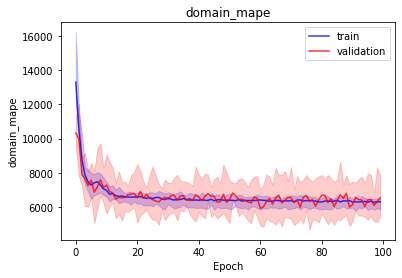

<b>domain_BrayCurtis</b>: 0.4131 (min: 0.4104, max: 0.4151)

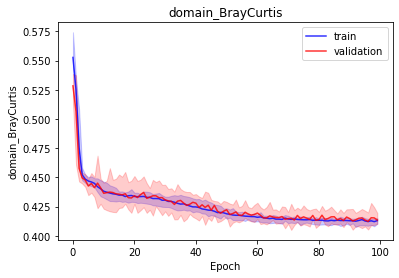

<b>domain_pearson_corr</b>: 0.7236 (min: 0.7215, max: 0.7263)

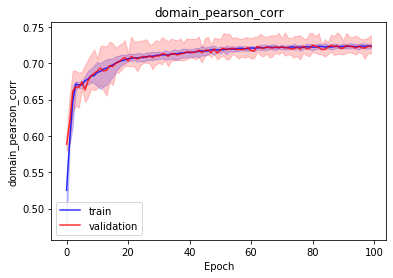

<b>domain_jensen_shannon_divergence</b>: 0.8841 (min: 0.8667, max: 0.8963)

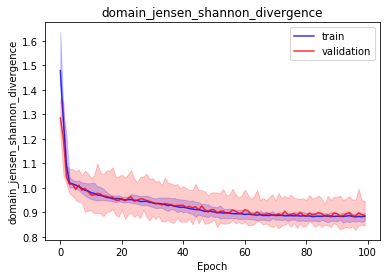

<b>latent_mae</b>: 0.0658 (min: 0.0440, max: 0.0812)

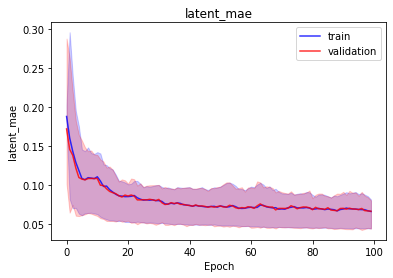

*************

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.4131866991519928 | 0.40775367617607117 | 0.41496479511260986 |
| pearson_corr | 0.724077582359314 | 0.7178254127502441 | 0.7301977872848511 |
| jensen_shannon_divergence | 0.8324867486953735 | 0.81802898645401 | 0.8394679427146912 |


### Best Otus
| OTU | mse |
|:----|----:|
| 238109 | 0.6828874945640564 |
| 216643 | 0.6830846667289734 |
| 137818 | 0.6831814050674438 |
| 555384 | 0.6832007765769958 |
| 510316 | 0.6833488941192627 |
| 584331 | 0.683479905128479 |
| 242284 | 0.6834832429885864 |
| 833317 | 0.6834875345230103 |
| 883748 | 0.6837084293365479 |
| 606989 | 0.6839526891708374 |


### Worst Otus
| OTU | mse |
|:----|----:|
| 532331 | 11.411737442016602 |
| 849156 | 10.65310001373291 |
| 691349 | 10.093212127685547 |
| 4318042 | 10.068367004394531 |
| 594013 | 10.057169914245605 |
| 1060517 | 9.723272323608398 |
| 589597 | 9.577911376953125 |
| 816441 | 9.101861000061035 |
| 107234 | 9.076936721801758 |
| 558264 | 8.902276992797852 |


([(<tensorflow.python.keras.engine.training.Model at 0x7f28f741b240>,
   <tensorflow.python.keras.engine.training.Model at 0x7f28f744acf8>),
  (<tensorflow.python.keras.engine.training.Model at 0x7f28f7327dd8>,
   <tensorflow.python.keras.engine.training.Model at 0x7f28f7397f28>),
  (<tensorflow.python.keras.engine.training.Model at 0x7f28f405ecf8>,
   <tensorflow.python.keras.engine.training.Model at 0x7f28f40c62e8>),
  (<tensorflow.python.keras.engine.training.Model at 0x7f28c816a780>,
   <tensorflow.python.keras.engine.training.Model at 0x7f28c8145da0>),
  (<tensorflow.python.keras.engine.training.Model at 0x7f28a81e1dd8>,
   <tensorflow.python.keras.engine.training.Model at 0x7f28a81c59e8>)],
 {'BrayCurtis': (0.4131867, 0.40775368, 0.4149648),
  'pearson_corr': (0.7240776, 0.7178254, 0.7301978),
  'jensen_shannon_divergence': (0.83248675, 0.818029, 0.83946794)})

In [2]:
# 93
perform_test_experiment(cv_folds=5, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=CenterLogRatio,
                        output_transform=None,
                        reconstruction_loss=MakeLoss(LossMeanSquaredErrorWrapper, CenterLogRatio, None), 
                        latent_space=100, 
                        layers=[521,256],
                        activation='relu', 
                        activation_latent='sigmoid', 
                        show_results=True, 
                        device='/CPU:0')

In [3]:
# 144
perform_test_experiment(cv_folds=5, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossCategoricalCrossentropyWrapper, Percentage, tf.keras.layers.Softmax), 
                        latent_space=100, 
                        layers=[521,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        show_results=True, 
                        device='/CPU:0')

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossCategoricalCrossentropyWrapper |
| Latent Space | 100 |
| Bioma Autoencoder | b -> 521 -> 256 -> 100 -> 256 -> 521 -> b |
| Domain Autoencoder | d -> 32 -> 16 -> 100 -> 256 -> 521 -> b |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 5 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/jorge/.local/share/virtualenvs/latent-microbioma-xfRRmAlD/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-c09abea537f5>", line 16, in <module>
    device='/CPU:0')
  File "/home/ishtar/tmp/latent-microbioma/test.py", line 74, in perform_test_experiment
    show_results, device)
  File "/home/ishtar/tmp/latent-microbioma/train.py", line 289, in perform_experiment
    verbose=-1)
  File "/home/ishtar/tmp/latent-microbioma/train.py", line 116, in train
    verbose=0)
  File "/home/jorge/.local/share/virtualenvs/latent-microbioma-xfRRmAlD/lib/python3.6/site-packages/tensorflow_core/python/keras/engine/training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "/home/jorge/.local/share/virtualenvs/latent-microbioma-xfRRmAlD/lib/python3.6/site-packages/tensorflow_core/python/keras/engine/training_v2.py", 

KeyboardInterrupt: 